# Pelatihan Statistics for Finance
## Tutorial for Project Assignments


### Proyek 1 (wajib semua kelompok): Uji Hipotesa dengan Chi Square 

In [1]:
import pandas as pd

aircraft_url='https://drive.google.com/file/d/1rDomvam5txPGDkretdY0bVtRSjjPqHGA/view?usp=sharing'
url='https://drive.google.com/uc?id=' + aircraft_url.split('/')[-2]

pd.options.display.max_columns = None
aircraft = pd.read_csv(url)
aircraft.head()

<ipython-input-1-41e784ec8a1d>:7: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  aircraft = pd.read_csv(url)


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,34.0,40,2.0,D,1,1.0,NaN,NaN,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,NaN,CLIMB,NaN,NaN,NaN,NaN,NaN,NE1,GULL,1,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,34.0,10,2.0,D,5,5.0,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,TAKEOFF RUN,NaN,NaN,0.0,NaN,0.0,ZZ201,HOUSE SPARROW,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,NaN,NaN,NaN,0.0,R1101,BARN OWL,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.0,22.0,NaN,2.0,D,NaN,NaN,NaN,NaN,KMYR,MYRTLE BEACH INTL,SC,ASO,NaN,APPROACH,DAY,NaN,200.0,138.0,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KJAX,JACKSONVILLE INTL,FL,ASO,NaN,CLIMB,DAY,NaN,100.0,200.0,NaN,ZX,FINCH,1,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
aircraft['Flight Impact'].unique()

array([nan, 'PRECAUTIONARY LANDING', 'OTHER', 'ABORTED TAKEOFF', 'NONE',
       'ENGINE SHUTDOWN', 'ENGINE SHUT DOWN'], dtype=object)

In [3]:
aircraft.loc[aircraft["Flight Impact"] == "ENGINE SHUT DOWN", "Flight Impact"] = "ENGINE SHUTDOWN"

In [4]:
aircraft['Flight Impact'].unique()

array([nan, 'PRECAUTIONARY LANDING', 'OTHER', 'ABORTED TAKEOFF', 'NONE',
       'ENGINE SHUTDOWN'], dtype=object)

In [5]:
visibility_impact = pd.crosstab(aircraft['Visibility'],aircraft['Flight Impact'])
print(visibility_impact)

Flight Impact  ABORTED TAKEOFF  ENGINE SHUTDOWN   NONE  OTHER  \
Visibility                                                      
DAWN                       124               29   2872     42   
DAY                       1730              254  49291   1238   
DUSK                       127               39   3787    110   
NIGHT                      239               98  25796    549   
UNKNOWN                      0                0      1      0   

Flight Impact  PRECAUTIONARY LANDING  
Visibility                            
DAWN                             190  
DAY                             3852  
DUSK                             309  
NIGHT                           1460  
UNKNOWN                            0  


In [6]:
subset = aircraft.loc[aircraft['Species Name'].isin(['MOURNING DOVE','GULL'])]
bird_impact = pd.crosstab(subset["Species Name"], subset["Flight Impact"])
print(bird_impact)

Flight Impact  ABORTED TAKEOFF  ENGINE SHUTDOWN  NONE  OTHER  \
Species Name                                                   
GULL                       280               44  3991    133   
MOURNING DOVE              125               15  2382     39   

Flight Impact  PRECAUTIONARY LANDING  
Species Name                          
GULL                             433  
MOURNING DOVE                    112  


In [7]:
operator_impact=pd.crosstab(aircraft['Operator'],aircraft['Flight Impact'])
print(operator_impact)

Flight Impact                ABORTED TAKEOFF  ENGINE SHUTDOWN  NONE  OTHER  \
Operator                                                                     
1US AIRWAYS                               50               20  3230     64   
ABELAG AVIATION                            0                0     1      0   
ABSA AEROLINHAS BRASILEIRAS                0                0     2      0   
ABX AIR                                    5                2  1257      9   
ACM AVIATION                               0                0     1      0   
...                                      ...              ...   ...    ...   
WORLDWIDE JET CHARTER                      0                0     3      0   
XL AIRWAYS UK                              0                0     2      0   
XOJET                                      1                0    33      0   
XTRA AIRWAYS                               0                1    13      1   
ZANTOP INTL AIRLINES                       0                0   

In [8]:
maker_impact=pd.crosstab(aircraft['Aircraft Make'],aircraft['Flight Impact'])
print(maker_impact)

Flight Impact  ABORTED TAKEOFF  ENGINE SHUTDOWN   NONE  OTHER  \
Aircraft Make                                                   
04A                         84               28  10781    214   
100                          0                0      1      0   
107                          0                0      1      0   
123                        192               17   2648     94   
128                          1                2    233     31   
...                        ...              ...    ...    ...   
972                          0                0      1      0   
975                          0                0      4      0   
998                          3                5     88     22   
HEL                          0                1      5      1   
Q                            0                0      1      0   

Flight Impact  PRECAUTIONARY LANDING  
Aircraft Make                         
04A                              221  
100                                1 

### Proyek 2 (hanya kelompok genap saja) : Uji Hipotesa dengan ANOVA

In [9]:
diet_url='https://drive.google.com/file/d/1rMjtfqbdgmOirQ7xQqx4_zgGmRVlslCe/view?usp=sharing'
url='https://drive.google.com/uc?id=' + diet_url.split('/')[-2]

pd.options.display.max_columns = None
diet = pd.read_csv(url)
diet.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,1,0,22,159,58,1,54.2
1,2,0,46,192,60,1,54.0
2,3,0,55,170,64,1,63.3
3,4,0,33,171,64,1,61.1
4,5,0,50,170,65,1,62.2


In [10]:
diet.describe().T

,count,mean,std,min,25%,50%,75%,max
Person,90.0,45.500000,26.124701,1.0,23.25,45.5,67.750,90.0
gender,90.0,0.444444,0.499688,0.0,0.00,0.0,1.000,1.0
Age,90.0,39.077778,9.716461,16.0,33.00,39.0,45.750,60.0
Height,90.0,170.900000,11.145665,141.0,164.25,170.0,175.750,201.0
pre.weight,90.0,72.533333,8.628669,58.0,66.00,72.0,79.000,103.0
Diet,90.0,2.000000,0.821071,1.0,1.00,2.0,3.000,3.0
weight6weeks,90.0,68.715556,8.795784,53.0,61.65,68.8,75.025,103.0


In [11]:
diet['BMI_start'] = diet['pre.weight']/(diet['Height']/100)**2
diet['BMI_end'] = diet['weight6weeks']/(diet['Height']/100)**2
diet ["BMI_change"] = diet['BMI_start'] - diet["BMI_end"]
diet.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,BMI_start,BMI_end,BMI_change
0,1,0,22,159,58,1,54.2,22.942130,21.439025,1.503105
1,2,0,46,192,60,1,54.0,16.276042,14.648438,1.627604
2,3,0,55,170,64,1,63.3,22.145329,21.903114,0.242215
3,4,0,33,171,64,1,61.1,21.887076,20.895318,0.991758
4,5,0,50,170,65,1,62.2,22.491349,21.522491,0.968858


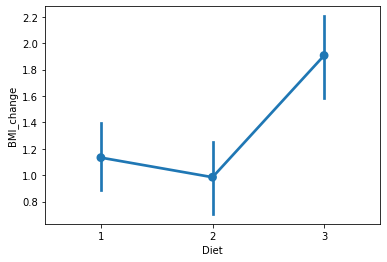

In [12]:
import seaborn as sns
fig = sns.pointplot(x='Diet', y='BMI_change', data = diet)

### Proyek 3 (hanya kelompok ganjil saja): Uji Hipotesa dengan Multiple Linear Regression 

In [13]:
performance_url='https://drive.google.com/file/d/1rGUlnP51ygNGFbuf533GYcOaqVGM2dcZ/view?usp=sharing'
url='https://drive.google.com/uc?id=' + performance_url.split('/')[-2]

pd.options.display.max_columns = None
performance = pd.read_csv(url)
performance.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [14]:
performance.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [15]:
performance.duplicated().sum()

127

In [16]:
performance = performance.drop_duplicates()
performance.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,9873.0,4.992100,2.589081,1.0,3.0,5.0,7.0,9.0
Previous Scores,9873.0,69.441102,17.325601,40.0,54.0,69.0,85.0,99.0
Sleep Hours,9873.0,6.531652,1.697683,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,9873.0,4.583004,2.867202,0.0,2.0,5.0,7.0,9.0
Performance Index,9873.0,55.216651,19.208570,10.0,40.0,55.0,70.0,100.0


In [17]:
performance['Extracurricular Activities'] = performance['Extracurricular Activities'].replace({'Yes' : 1, 'No' : 0})

In [18]:
performance.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [19]:
performance.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,9873.0,4.992100,2.589081,1.0,3.0,5.0,7.0,9.0
Previous Scores,9873.0,69.441102,17.325601,40.0,54.0,69.0,85.0,99.0
Extracurricular Activities,9873.0,0.494986,0.500000,0.0,0.0,0.0,1.0,1.0
Sleep Hours,9873.0,6.531652,1.697683,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,9873.0,4.583004,2.867202,0.0,2.0,5.0,7.0,9.0
Performance Index,9873.0,55.216651,19.208570,10.0,40.0,55.0,70.0,100.0
